In [1]:
%load_ext autoreload
%autoreload 2

import pymc3 as pm
import numpy as np
import math as m
import matplotlib.pyplot as plt
import dive 
import deerlab as dl
from scipy.io import loadmat

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## Load and display data

In [2]:
loaded_data = np.genfromtxt("../../data/2g_Pid-3223_Sid-36787.dat", skip_header = 1, delimiter = ',')
Pid = 3223
t = loaded_data[:,0]
Vexp = loaded_data[:,1]

In [4]:
len(t)

321

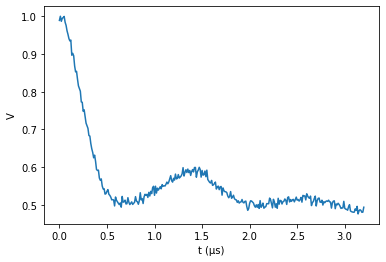

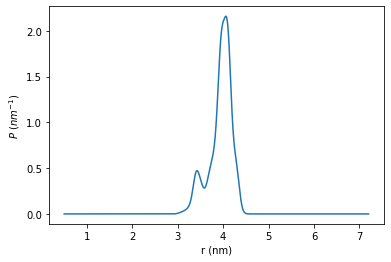

In [7]:
plt.plot(t, Vexp)
plt.xlabel('t (µs)')
plt.ylabel('V')
plt.show()

P0s = loadmat('..\..\data\edwards_testset\distributions_2LZM.mat')['P0']
rref = np.squeeze(loadmat('..\..\data\edwards_testset\distributions_2LZM.mat')['r0'])
Pref = P0s[Pid-1,:]

plt.plot(rref, Pref)
plt.xlabel('r (nm)')
plt.ylabel(r'$P~(nm^{-1})$')
plt.show()



## rmin = 20 Å

In [4]:
pars = {"method": 'regularization', "r": np.linspace(2,6,200)}

model_1 = dive.model(t, Vexp, pars)

MCMCparameters = {"draws": 5000,"tune": 1000, "chains": 4, 'cores': 4}
trace_1 = dive.sample(model_1,MCMCparameters)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>SamplePfromV: [P]
>randDelta: [delta]
>NUTS: [k, V0, lamb, sigma]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 1016 seconds.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
The number of effective samples is smaller than 10% for some parameters.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
k,0.064,0.001,0.062,0.066,0.000,0.000,5641.0,8130.0,1.00
λ,0.407,0.002,0.403,0.411,0.000,0.000,4231.0,6569.0,1.00
V₀,1.006,0.003,1.001,1.011,0.000,0.000,4541.0,7102.0,1.00
σ,0.007,0.000,0.007,0.008,0.000,0.000,10533.0,10887.0,1.00
δ,1599.122,542.235,678.757,2622.097,16.798,11.882,1024.0,2598.0,1.01
lg(α),-0.540,0.076,-0.681,-0.398,0.002,0.002,1074.0,2669.0,1.01


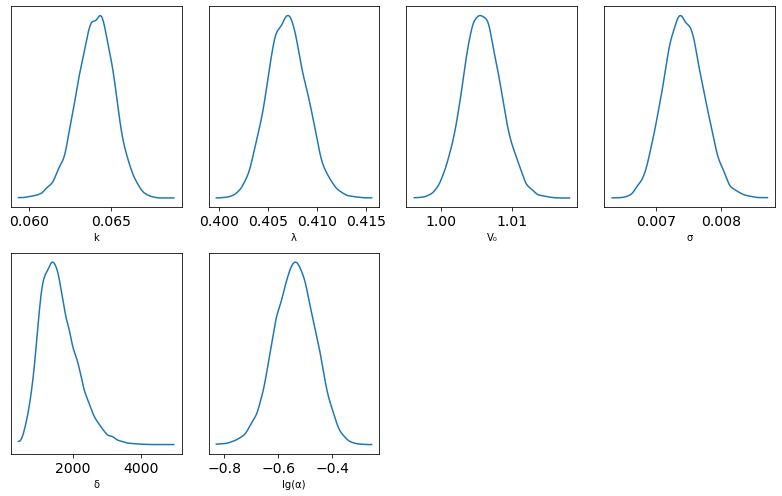

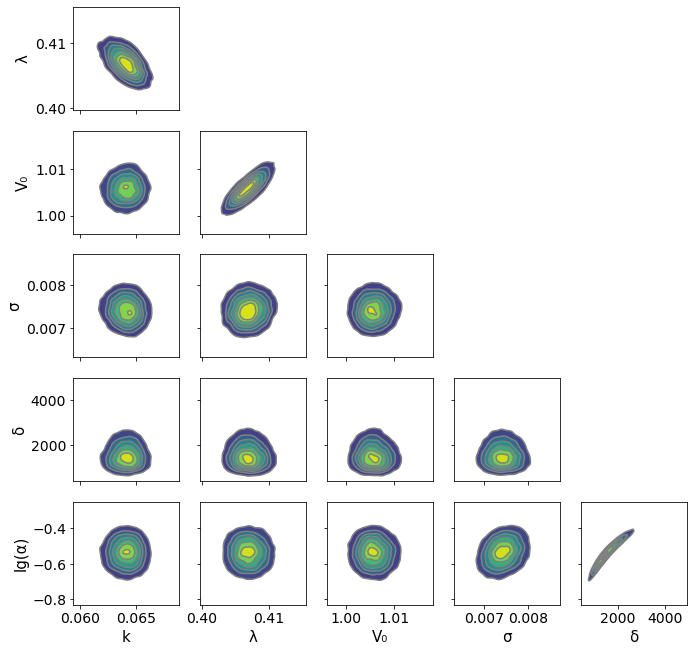

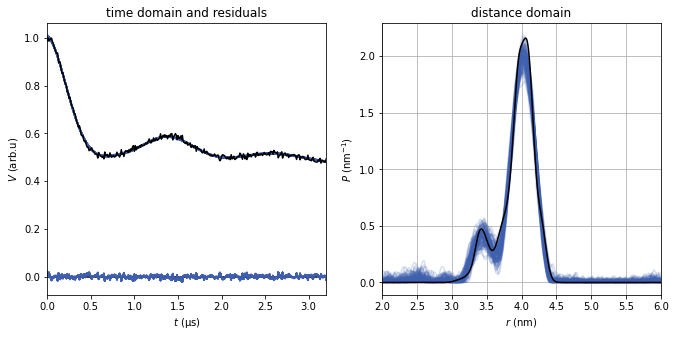

In [8]:
dive.summary(trace_1, model_1, Pid = Pid)  

## rmin = 0.01 Å

In [9]:
pars = {"method": 'regularization', "r": np.linspace(0.001,6,300)}

model2 = dive.model(t, Vexp, pars)

MCMCparameters = {"draws": 5000,"tune": 1000, "chains": 4, 'cores': 4}
trace2 = dive.sample(model2,MCMCparameters)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>SamplePfromV: [P]
>randDelta: [delta]
>NUTS: [k, V0, lamb, sigma]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 2847 seconds.
There were 98 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6363615431041478, but should be close to 0.8. Try to increase the number of tuning steps.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 10% for some parameters.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
k,0.064,0.001,0.062,0.066,0.000,0.000,3183.0,4816.0,1.0
λ,0.413,0.003,0.408,0.418,0.000,0.000,1599.0,2609.0,1.0
V₀,1.016,0.004,1.009,1.024,0.000,0.000,1607.0,2703.0,1.0
σ,0.008,0.000,0.007,0.008,0.000,0.000,2812.0,2567.0,1.0
δ,2342.391,707.328,1135.464,3664.151,22.207,15.707,985.0,1905.0,1.0
lg(α),-0.448,0.068,-0.580,-0.324,0.002,0.002,1029.0,2070.0,1.0


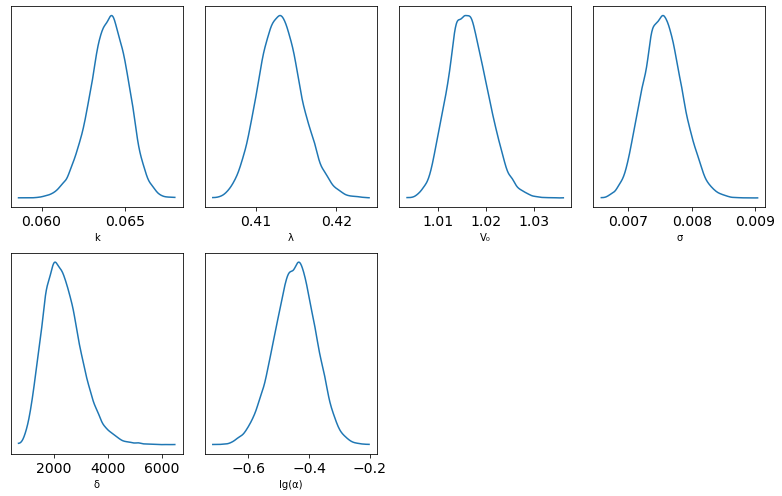

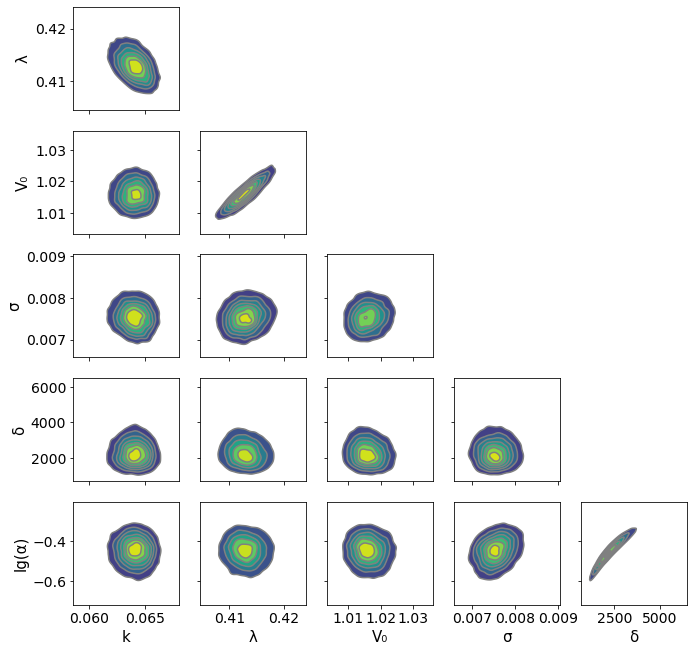

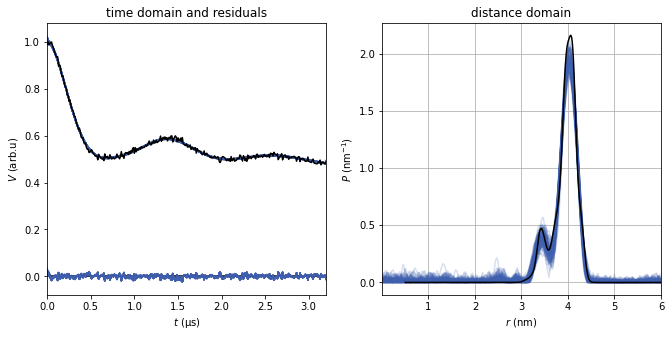

In [10]:
dive.summary(trace2, model2, Pid = Pid)  

## short distances plus third data points

In [11]:
Vprune = Vexp[::3] 
tprune = t[::3]

pars = {"method": 'regularization', "r": np.linspace(0.001,6,300)}

model3 = dive.model(tprune, Vprune, pars)

MCMCparameters = {"draws": 5000,"tune": 1000, "chains": 4, 'cores': 4}
trace3 = dive.sample(model3,MCMCparameters)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>SamplePfromV: [P]
>randDelta: [delta]
>NUTS: [k, V0, lamb, sigma]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 2322 seconds.
The acceptance probability does not match the target. It is 0.8826968382168948, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 10% for some parameters.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
k,0.063,0.002,0.058,0.067,0.000,0.000,4425.0,5194.0,1.00
λ,0.416,0.004,0.408,0.424,0.000,0.000,3270.0,5427.0,1.00
V₀,1.024,0.006,1.014,1.035,0.000,0.000,3883.0,6645.0,1.00
σ,0.009,0.001,0.008,0.010,0.000,0.000,4900.0,4572.0,1.00
δ,3170.035,1298.631,1137.074,5544.489,55.098,38.980,536.0,1169.0,1.01
lg(α),-0.316,0.096,-0.501,-0.138,0.004,0.003,600.0,1374.0,1.01


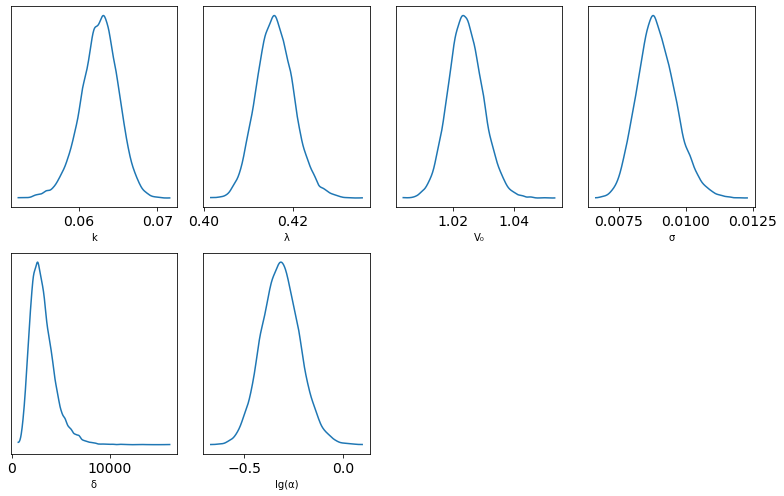

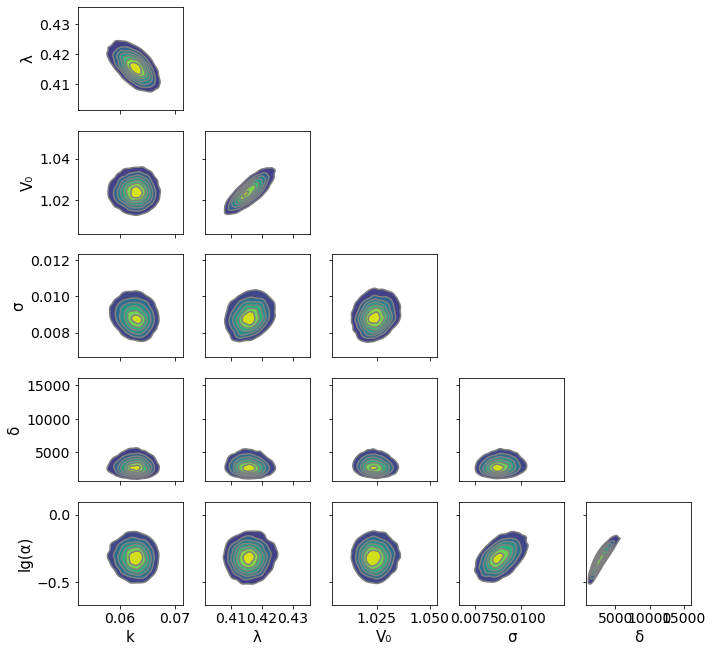

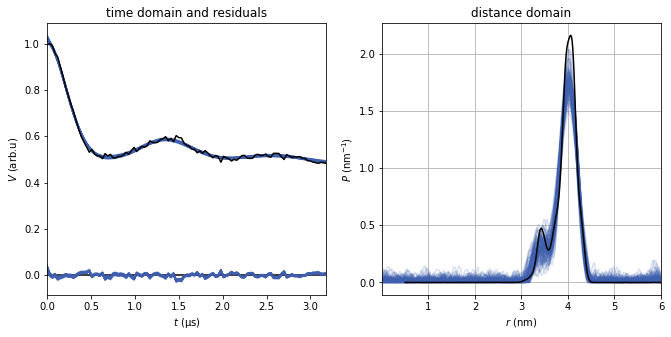

In [12]:
dive.summary(trace3, model3, Pid = Pid)  

## short distances plus reduced r resolution plus pruned t

In [13]:
Vprune = Vexp[::4] 
tprune = t[::4]

pars = {"method": 'regularization', "r": np.linspace(0.001,8,50)}

model4 = dive.model(tprune, Vprune, pars)

MCMCparameters = {"draws": 5000,"tune": 1000, "chains": 4, 'cores': 4}
trace4 = dive.sample(model4,MCMCparameters)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>SamplePfromV: [P]
>randDelta: [delta]
>NUTS: [k, V0, lamb, sigma]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 108 seconds.
The acceptance probability does not match the target. It is 0.8856102738498144, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
k,0.064,0.003,0.058,0.069,0.000,0.000,2601.0,3502.0,1.0
λ,0.407,0.005,0.399,0.416,0.000,0.000,2270.0,3633.0,1.0
V₀,1.012,0.005,1.002,1.023,0.000,0.000,3098.0,4541.0,1.0
σ,0.008,0.001,0.007,0.009,0.000,0.000,5386.0,4859.0,1.0
δ,5.473,3.083,0.867,11.029,0.043,0.031,4993.0,9787.0,1.0
lg(α),-1.759,0.134,-2.006,-1.506,0.002,0.001,4592.0,7953.0,1.0


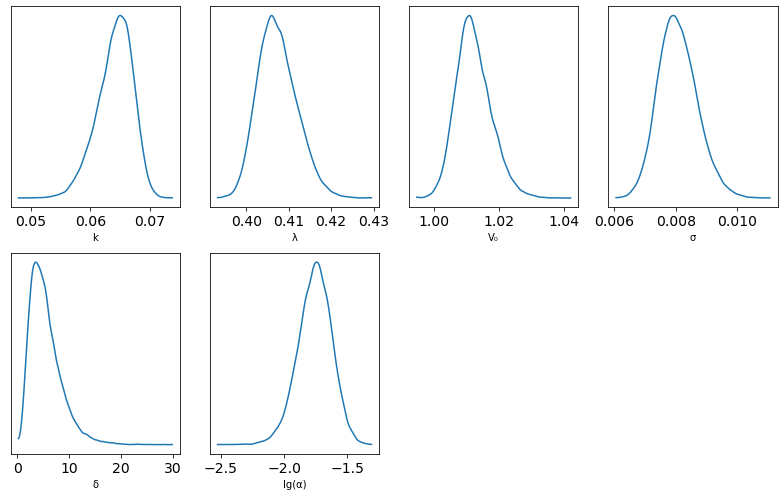

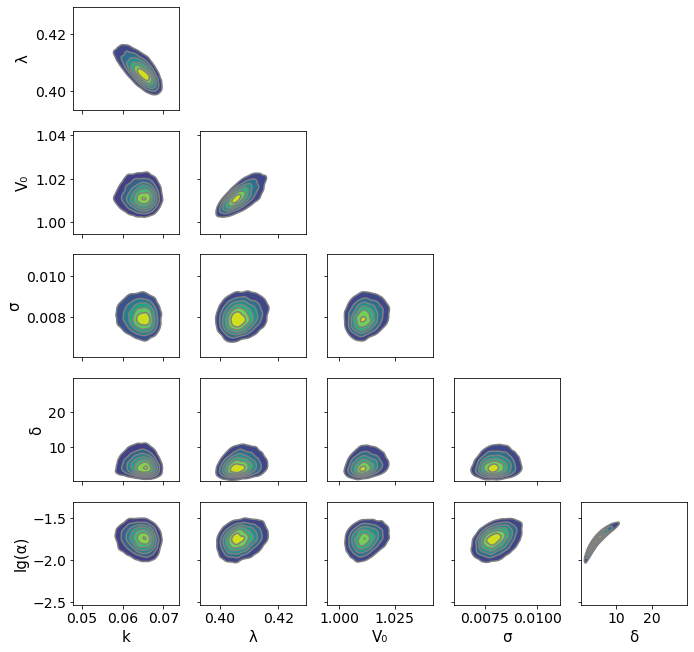

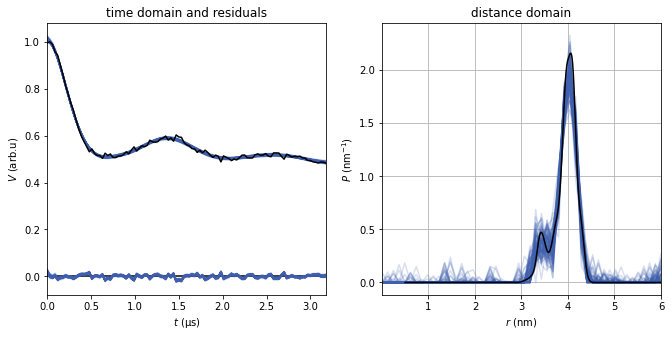

In [14]:
dive.summary(trace4, model4, Pid = Pid)  